In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spaceX.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",None)

In [3]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,6,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,0,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0003,-80.577366,28.561857
1,8,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,0,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0005,-80.577366,28.561857
2,10,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,0,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B0007,-80.577366,28.561857
3,11,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,0,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B1003,-120.610829,34.632093
4,12,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,0,1,False,False,False,5e9e3032383ecb6bb234e7ca,1.0,0,B1004,-80.577366,28.561857


In [4]:
df.isnull().sum()

FlightNumber      0
Date              0
BoosterVersion    0
PayloadMass       0
Orbit             0
LaunchSite        0
Outcome           0
Flights           0
GridFins          0
Reused            0
Legs              0
LandingPad        0
Block             0
ReusedCount       0
Serial            0
Longitude         0
Latitude          0
dtype: int64

In [5]:
df.describe()

,FlightNumber,PayloadMass,Outcome,Flights,Block,ReusedCount,Longitude,Latitude
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,56.477778,6123.547647,0.666667,1.788889,3.500000,3.188889,-86.366477,29.449963
std,29.232977,4732.115291,0.474045,1.213172,1.595288,4.194417,14.149518,2.141306
min,6.000000,350.000000,0.000000,1.000000,1.000000,0.000000,-120.610829,28.561857
25%,32.250000,2510.750000,0.000000,1.000000,2.000000,0.000000,-80.603956,28.561857
50%,55.500000,4701.500000,1.000000,1.000000,4.000000,1.000000,-80.577366,28.561857
75%,82.750000,8912.750000,1.000000,2.000000,5.000000,4.000000,-80.577366,28.608058
max,106.000000,15600.000000,1.000000,6.000000,5.000000,13.000000,-80.577366,34.632093


In [6]:
df["Orbit"].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [7]:
df["LaunchSite"].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [8]:
df["Reused"].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [9]:
df["GridFins"].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [10]:
landing_outcomes = df["Outcome"].value_counts()

In [11]:
for i, outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 1
1 0


In [12]:
df["LaunchSite"].value_counts()

CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [13]:

outcome_counts = df["Outcome"].value_counts()

success_rate = outcome_counts[1] / outcome_counts.sum() * 100

print("Success Rate: {:.2f}%".format(success_rate))


Success Rate: 66.67%


In [14]:
outcome_per_site = df.groupby(["LaunchSite"])["Outcome"].mean()*100
outcome_per_site

LaunchSite
CCSFS SLC 40    60.000000
KSC LC 39A      77.272727
VAFB SLC 4E     76.923077
Name: Outcome, dtype: float64

<Axes: xlabel='LaunchSite', ylabel='Outcome'>

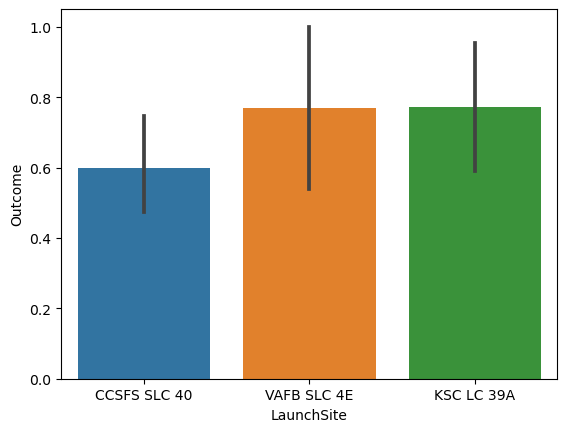

In [15]:
sns.barplot(df,x="LaunchSite",y="Outcome")

<Figure size 1000x1000 with 0 Axes>

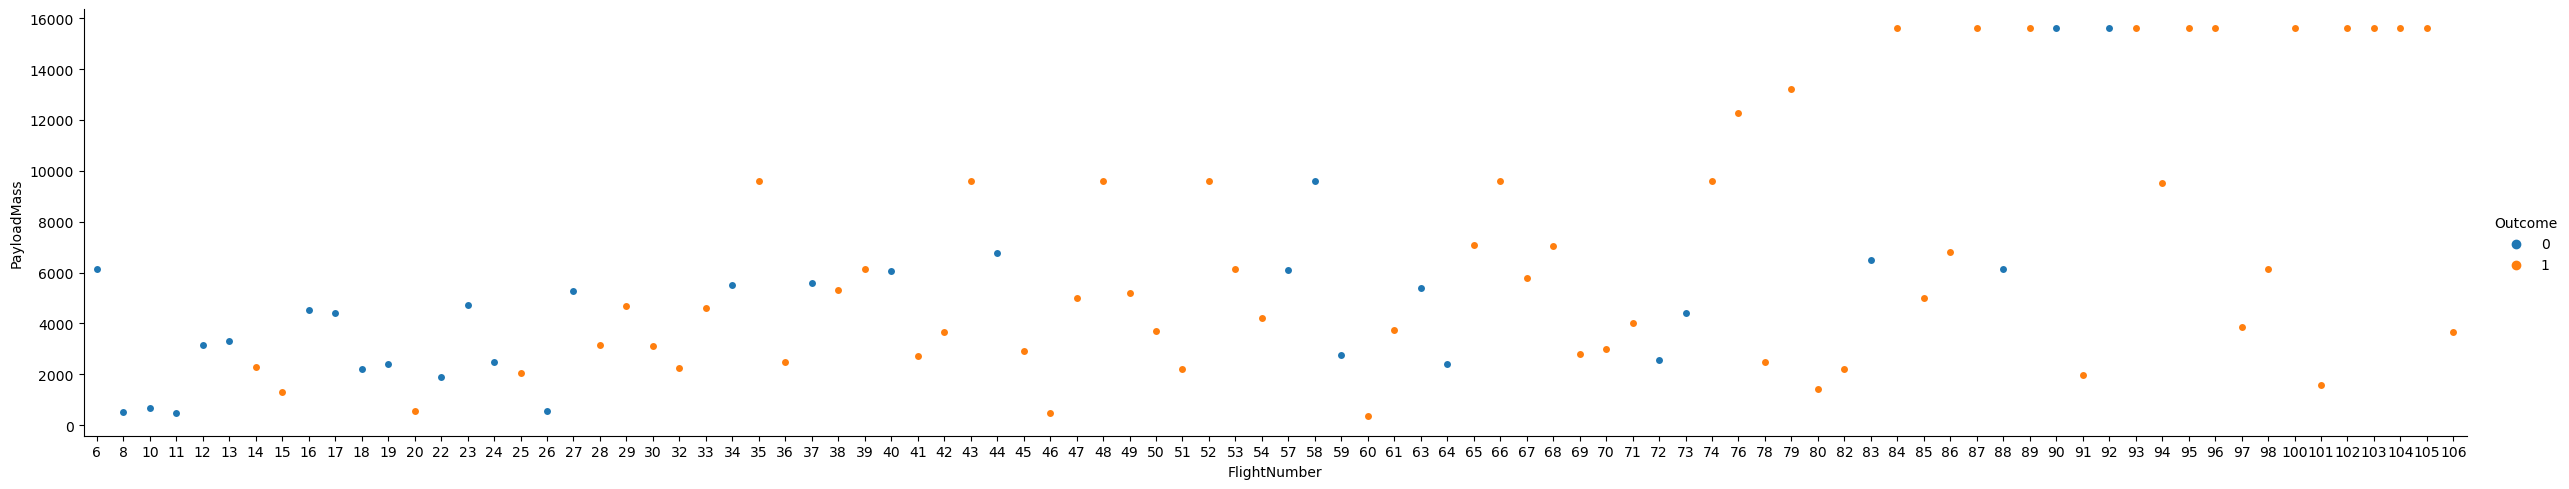

In [16]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x="FlightNumber", y="PayloadMass", aspect=5, hue="Outcome")
plt.xlabel=("FlightNumber")
plt.ylabel=("PayloadMass (KG)")
plt.show()

In [17]:
success_failure = df.groupby(["FlightNumber","PayloadMass"])["Outcome"].mean().reset_index()
success_failure.sort_values("PayloadMass",ascending=False)

,FlightNumber,PayloadMass,Outcome
71,87,15600.0,1.0
80,96,15600.0,1.0
68,84,15600.0,1.0
73,89,15600.0,1.0
76,92,15600.0,0.0
...,...,...,...
17,26,553.0,0.0
1,8,525.0,0.0
3,11,500.0,0.0
36,46,475.0,1.0


In [18]:
df["Outcome"].value_counts()

1    60
0    30
Name: Outcome, dtype: int64

In [19]:
outcome = df.groupby(["PayloadMass"])["Outcome"].mean().reset_index()
sorted_outcome = outcome.sort_values("PayloadMass", ascending=False)
sorted_outcome

,PayloadMass,Outcome
67,15600.0,0.846154
66,13200.0,1.000000
65,12259.0,1.000000
64,9600.0,0.857143
63,9525.0,1.000000
...,...,...
4,553.0,0.000000
3,525.0,0.000000
2,500.0,0.000000
1,475.0,1.000000


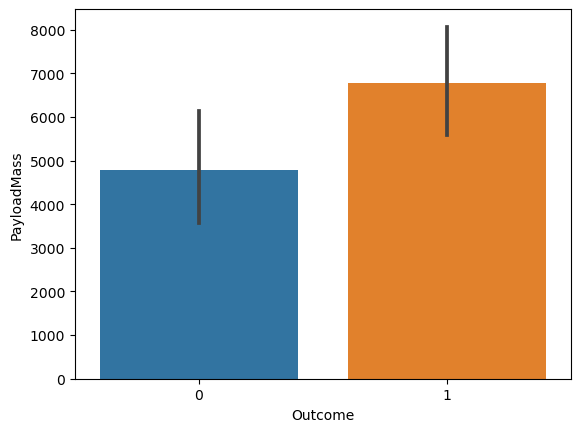

In [20]:
sns.barplot(df,x="Outcome",y="PayloadMass")
plt.xlabel = "outcome value"
plt.ylabel = "PayLoadMass in KGs"
plt.show()

/var/folders/1f/v0ynhgv93slbr8jxbm5pnbxr0000gn/T/ipykernel_2371/2157429118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

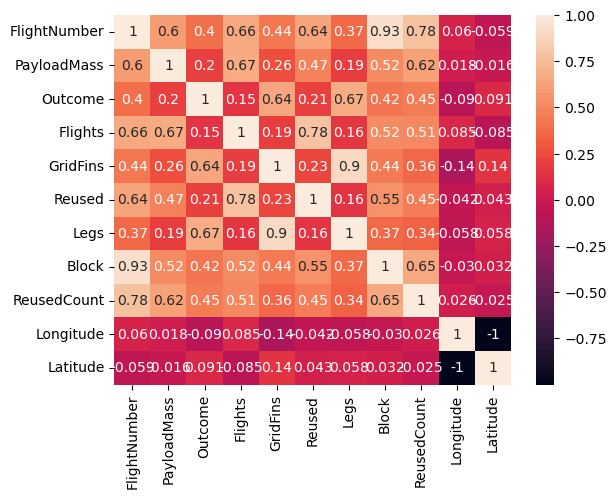

In [21]:
sns.heatmap(df.corr(),annot=True)


In [22]:
df.corr()

/var/folders/1f/v0ynhgv93slbr8jxbm5pnbxr0000gn/T/ipykernel_2371/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,FlightNumber,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude
FlightNumber,1.000000,0.598667,0.395944,0.657113,0.436291,0.636457,0.370024,0.930125,0.777061,0.059933,-0.058926
PayloadMass,0.598667,1.000000,0.200014,0.667616,0.257870,0.469146,0.192624,0.517606,0.621301,0.017674,-0.016144
Outcome,0.395944,0.200014,1.000000,0.149787,0.642540,0.207582,0.673825,0.416015,0.450189,-0.089519,0.090782
Flights,0.657113,0.667616,0.149787,1.000000,0.194457,0.782631,0.157727,0.519603,0.506952,0.085228,-0.084547
GridFins,0.436291,0.257870,0.642540,0.194457,1.000000,0.229341,0.902302,0.438023,0.363805,-0.143677,0.144427
Reused,0.636457,0.469146,0.207582,0.782631,0.229341,1.000000,0.155552,0.548036,0.454834,-0.042160,0.042669
Legs,0.370024,0.192624,0.673825,0.157727,0.902302,0.155552,1.000000,0.368994,0.343275,-0.057701,0.058161
Block,0.930125,0.517606,0.416015,0.519603,0.438023,0.548036,0.368994,1.000000,0.650685,-0.030037,0.031621
ReusedCount,0.777061,0.621301,0.450189,0.506952,0.363805,0.454834,0.343275,0.650685,1.000000,0.026070,-0.024863
Longitude,0.059933,0.017674,-0.089519,0.085228,-0.143677,-0.042160,-0.057701,-0.030037,0.026070,1.000000,-0.999966


In [23]:
df["LaunchSite"].unique()

array(['CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)